Linear Regression MSE: 24.29111947497352
Linear Regression R^2: 0.668759493535632
Random Forest MSE: 8.100796450980393
Random Forest R^2: 0.8895352714413989


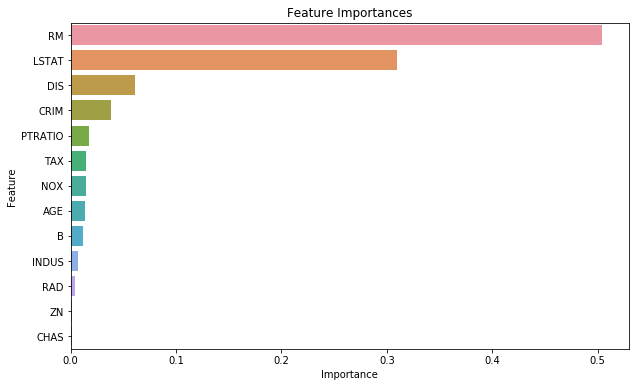

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Boston Housing dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
data = pd.concat([X, y], axis=1)

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R^2:", r2_lr)

# Model building (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Model evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R^2:", r2_rf)

# Feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


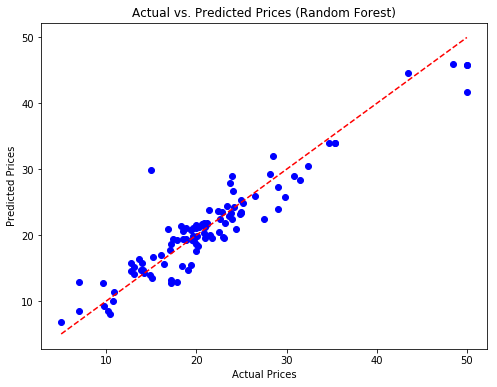

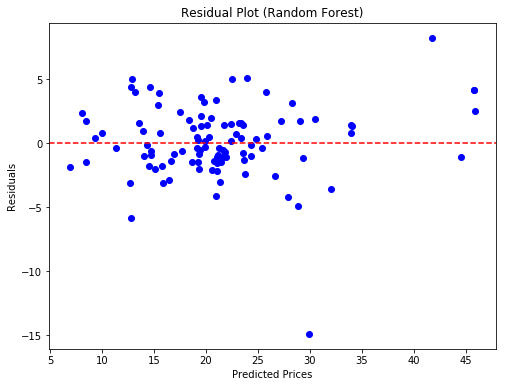

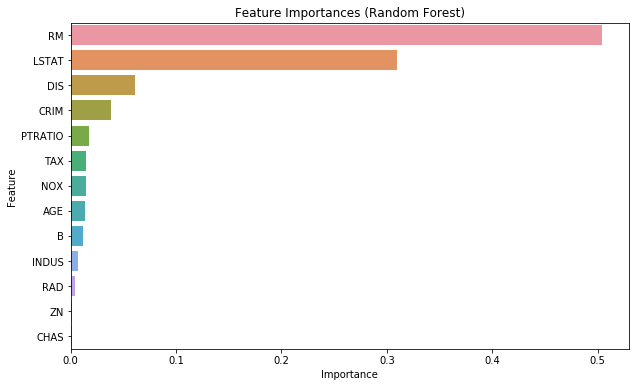

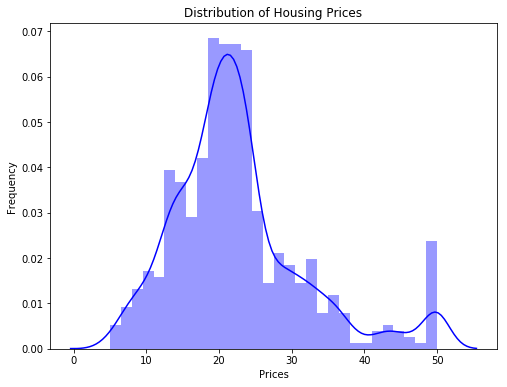

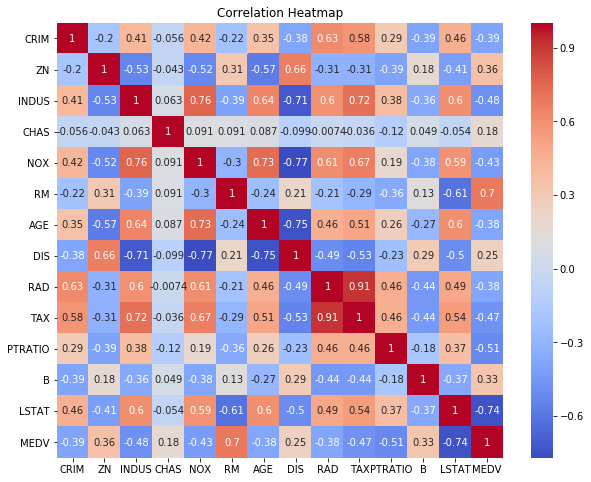

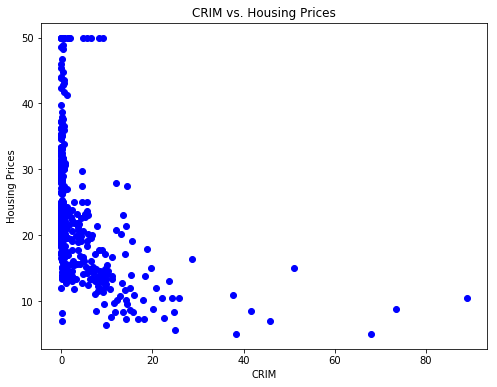

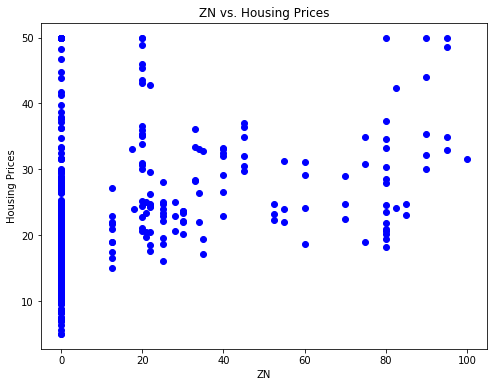

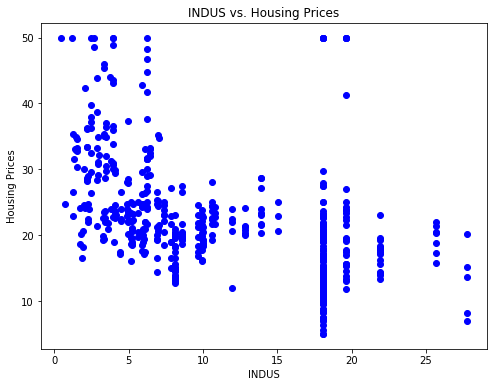

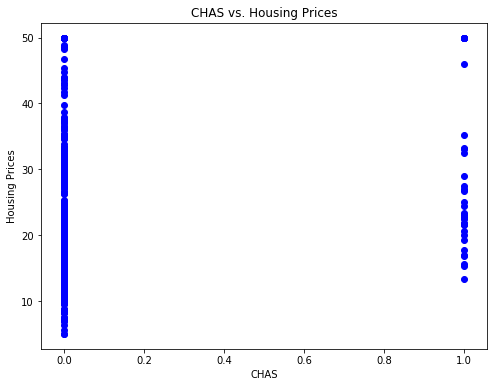

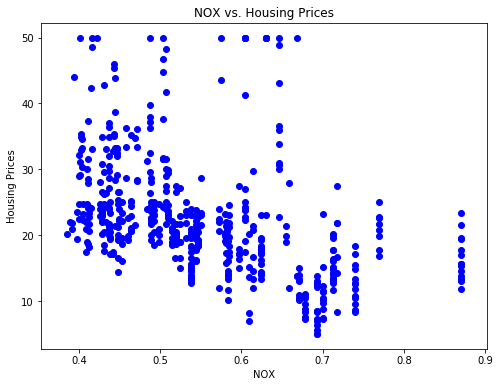

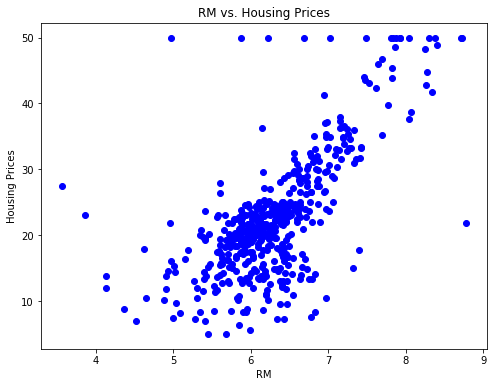

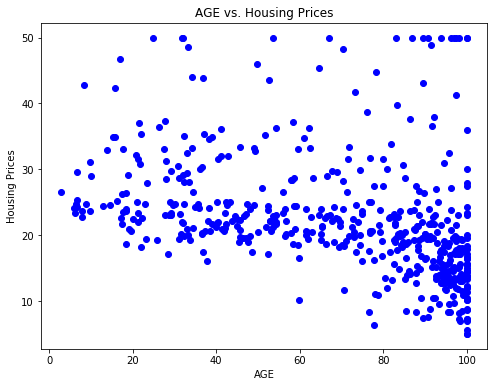

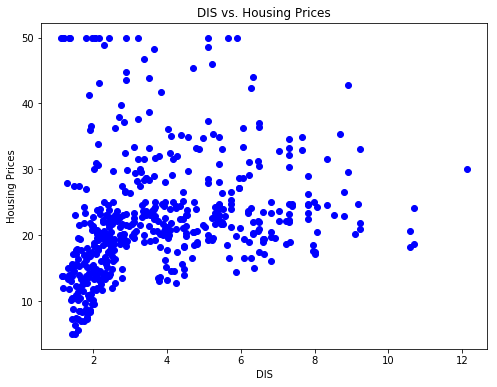

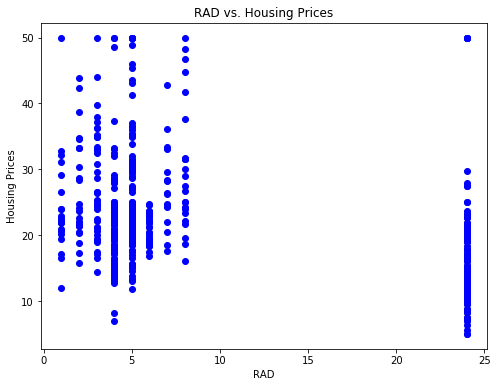

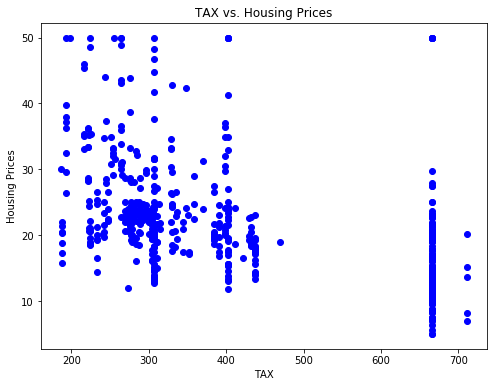

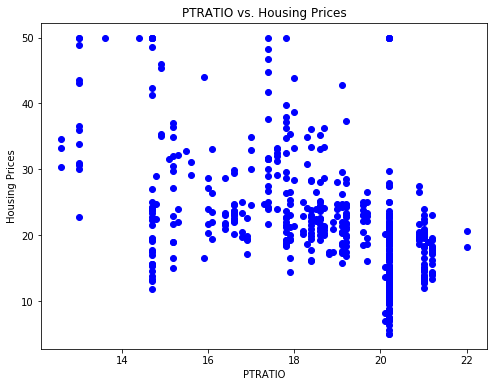

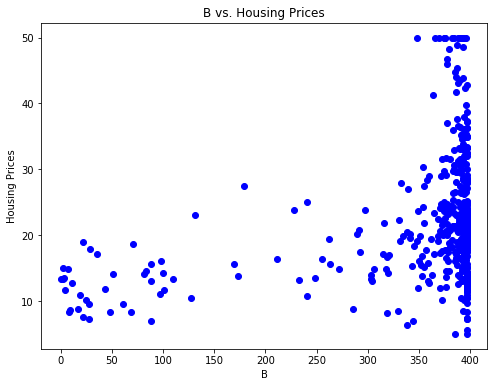

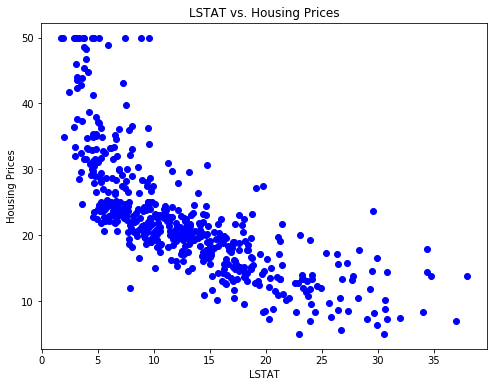

Shape of y_test: (102, 1)
Shape of y_pred_rf: (102,)


In [7]:
# Visualize actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], linestyle='--', color='red')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Reshape y_test and y_pred_rf into 1D arrays
y_test_1d = y_test.values.ravel()
y_pred_rf_1d = y_pred_rf.ravel()

# Residual plot
plt.figure(figsize=(8, 6))
residuals = y_test_1d - y_pred_rf_1d
plt.scatter(y_pred_rf_1d, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


# Feature importances bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Distribution of housing prices
plt.figure(figsize=(8, 6))
sns.distplot(data['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Housing Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature vs. Price Scatter Plots
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, color='blue')
    plt.title(f'{feature} vs. Housing Prices')
    plt.xlabel(feature)
    plt.ylabel('Housing Prices')
    plt.show()
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_rf:", y_pred_rf.shape)
y_pred_rf = y_pred_rf.reshape(-1, 1)
